<a href="https://colab.research.google.com/github/AdrianRamos956/Homeworks/blob/main/YZQ049_2_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1] Create quadratic/cubic features such as, also you need to use the fit_transform() method.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.data import iris_data
from mlxtend.plotting import scatterplotmatrix
import numpy as np
dataset = pd.read_csv('housing.data2.txt',header = None, sep = '\s+' )
dataset.to_csv("housing.data2.csv", header=["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"], index = False)
df = pd.read_csv('housing.data2.csv')
df.head()
cdf = df[["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]]
cdf.head(9)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


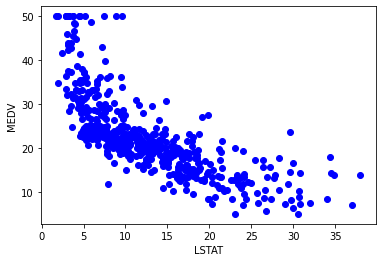

In [ ]:
plt.scatter(cdf.LSTAT, cdf.MEDV,  color='blue')
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

In [ ]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
train_x = np.asanyarray(train[['LSTAT']])
train_y = np.asanyarray(train[['MEDV']])

test_x = np.asanyarray(test[['LSTAT']])
test_y = np.asanyarray(test[['MEDV']])

Linear(D = 1), R^2 = 0.54
Quadratic(D = 2), R^2 = 0.64
Quadratic(D = 3), R^2 = 0.66


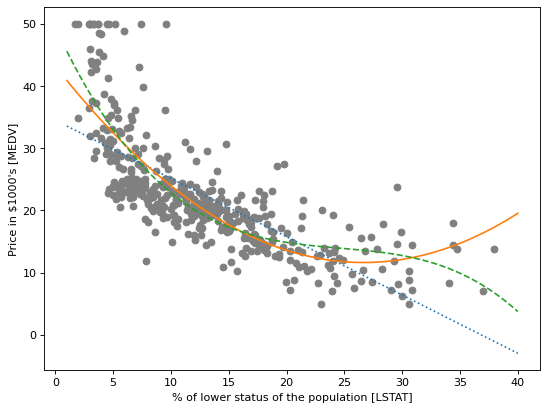

In [ ]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)

plt.scatter(train.LSTAT, train.MEDV,  color='grey')

x = train.LSTAT
y = train.MEDV

d1 = np.poly1d(np.polyfit(x, y, 1))
d2 = np.poly1d(np.polyfit(x, y, 2))
d3 = np.poly1d(np.polyfit(x, y, 3))

myline = np.linspace(1, 40, 100)


plt.plot(myline, d1(myline), ':')
plt.plot(myline, d2(myline))
plt.plot(myline, d3(myline), '--')

#plt.plot(XX, yy, '-r' )
plt.xlabel("% of lower status of the population [LSTAT]")
plt.ylabel("Price in $1000's [MEDV]")

mymodel = np.poly1d(np.polyfit(x, y, 1))
print('Linear(D = 1), R^2 = %.2f' % r2_score(y, mymodel(x)))

mymodel = np.poly1d(np.polyfit(x, y, 2))
print('Quadratic(D = 2), R^2 = %.2f' % r2_score(y, mymodel(x)))

mymodel = np.poly1d(np.polyfit(x, y, 3))
print('Quadratic(D = 3), R^2 = %.2f' % r2_score(y, mymodel(x)))

It is obvoius the one with the higher score is the cubic fit one because it is able to propperly cover almost all of the trainnig data propperly but even then we are still at below 70 so it is not great but it is the best we have. As for the linear one, while being the simplest it is also the worst not being able to move really just had it cut the graph in half and lead to a not so great R2 value. And for the quadratic it was pretty good in all honesty but it wastn as good as teh quadratic.